# 在 Google Colab 上运行中国象棋姿态估计项目

- 1. 训练
- 2. 测试
- 3. 模型推理
- 4. transform 预览
- 5. 导出 onnx


[![colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/TheOne1006/chinese-chess-recognition/cchess_pose/examples/run_on_colab.ipynb)


# 0. 持久化 pip_cache
- 避免在 mmcv 编译耗时
- tips: cpu 还是 gpu 版本

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
%env PIP_CACHE_DIR=/content/drive/MyDrive/pip_cache_cchess_reg_gpu

env: PIP_CACHE_DIR=/content/drive/MyDrive/pip_cache_cchess_reg_gpu


## 1. 检查 GPU 环境

首先，让我们检查 Colab 分配的 GPU 类型。

In [15]:
!nvidia-smi

Sun Mar  2 14:25:28 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 2. 克隆项目代码

接下来，我们克隆项目代码到 Colab 环境中。

In [3]:
# 克隆项目代码
!git clone https://github.com/TheOne1006/chinese-chess-recognition.git
%cd chinese-chess-recognition

Cloning into 'chinese-chess-recognition'...
remote: Enumerating objects: 160, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 160 (delta 39), reused 158 (delta 37), pack-reused 0 (from 0)
Receiving objects: 100% (160/160), 4.64 MiB | 19.00 MiB/s, done.
Resolving deltas: 100% (39/39), done.
/content/chinese-chess-recognition


In [4]:
# 切换到  develop 分支
!git checkout -b develop origin/develop

Branch 'develop' set up to track remote branch 'develop' from 'origin'.
Switched to a new branch 'develop'


## 3. 安装依赖

安装项目所需的依赖，包括 MMPose 和其他必要的库。  
在 colab 上非常耗时...

In [3]:
# 安装 PyTorch 和 torchvision
%cd /content/chinese-chess-recognition
!pip install -e .

/content/chinese-chess-recognition
Obtaining file:///content/chinese-chess-recognition
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.7 MB/s eta 0:00:00
  Building editable for cchess_recognition (pyproject.toml) ... done
  Created wheel for cchess_recognition: filename=cchess_recognition-1.0.1-0.editable-py3-none-any.whl size=8088 sha256=0dadf50434db007c1df75c29ba5bc0e30e8cae30da950e602791e98b066d0129
  Stored in directory: /tmp/pip-ephem-wheel-cache-f0gsgb3h/wheels/92/88/5b/d6aaafa3917bc85d75a639293ce082ef89e85a75b52caae5bc
Successfully built cchess_recognition
  Attempting uninstall: cchess_recognition
    Found 

## 4. 下载数据集

下载并准备中国象棋姿态估计数据集。

In [17]:
# 创建数据目录
%cd /content/chinese-chess-recognition/cchess_pose
!gdown https://drive.google.com/uc?id=1pbUt9mTVxpNQahZUmYKMPYMh0MS7KJ3O
!unzip pose_data.zip

/content/chinese-chess-recognition/cchess_pose
Downloading...
From (original): https://drive.google.com/uc?id=1pbUt9mTVxpNQahZUmYKMPYMh0MS7KJ3O
From (redirected): https://drive.google.com/uc?id=1pbUt9mTVxpNQahZUmYKMPYMh0MS7KJ3O&confirm=t&uuid=35b4fa8e-8c97-4f19-97c1-1297fd31bce0
To: /content/chinese-chess-recognition/cchess_pose/pose_data.zip
100% 94.0M/94.0M [00:01<00:00, 73.6MB/s]
Archive:  pose_data.zip
replace data/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data/.DS_Store          
replace __MACOSX/data/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/data/._.DS_Store  
 extracting: data/.gitkeep           
  inflating: data/coco_4/.DS_Store   
  inflating: __MACOSX/data/coco_4/._.DS_Store  
  inflating: data/coco_4/keypoints_train/084_04-29-5.jpg  
  inflating: data/coco_4/keypoints_train/video070-020.jpg  
  inflating: data/coco_4/keypoints_train/js_v2_631x692_padding_52_43-2_ba3_n3_r_k7_a9_p3_p2_n3_b2_p_p3_c19_B4_A_r5_c_AB2_.png  
 

## 5. 下载预训练模型

下载 RTMPose 的预训练模型权重。

In [12]:
# 创建预训练模型目录
!mkdir -p /content/chinese-chess-recognition/cchess_pose/checkpoints
%cd /content/chinese-chess-recognition/cchess_pose/checkpoints
!gdown https://drive.google.com/uc?id=1evYnmVEiwfv_HpYYhG23y5u_6uuprtqm

/content/chinese-chess-recognition/cchess_pose/checkpoints
Downloading...
From (original): https://drive.google.com/uc?id=1evYnmVEiwfv_HpYYhG23y5u_6uuprtqm
From (redirected): https://drive.google.com/uc?id=1evYnmVEiwfv_HpYYhG23y5u_6uuprtqm&confirm=t&uuid=832d32bb-4f4b-491e-a8fb-cb03bd83e26c
To: /content/chinese-chess-recognition/cchess_pose/checkpoints/best_coco_AP_epoch_220.pth
100% 29.5M/29.5M [00:00<00:00, 48.5MB/s]


## 6. 训练模型

使用 `train.py` 脚本训练模型。

In [18]:
%cd /content/chinese-chess-recognition/cchess_pose

/content/chinese-chess-recognition/cchess_pose


In [20]:
# 训练模型（可以根据需要调整参数）
!python tools/train.py configs/rtmpose-t-cchess_4-demo.py \
    --work-dir work_dirs/rtmpose-t-cchess_4-demo # --amp

/usr/local/lib/python3.11/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
2025-03-02 15:24:56.860544: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740929097.077638   24555 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has alrea

## 7. 测试模型

使用 `test.py` 脚本评估训练好的模型。

In [21]:
# 测试模型
%cd /content/chinese-chess-recognition/cchess_pose
!python tools/test.py \
    configs/rtmpose-t-cchess_4.py \
    checkpoints/best_coco_AP_epoch_220.pth

/content/chinese-chess-recognition/cchess_pose
/usr/local/lib/python3.11/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
2025-03-02 15:26:28.842140: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740929188.866958   25030 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to regis

## 8. 模型推理

使用训练好的模型进行推理，检测棋盘的四个角点。

In [1]:
%cd /content/chinese-chess-recognition/cchess_pose
import sys
import os

# 添加包所在目录到 Python 路径
# sys.path.append(os.path.abspath('.'))

/content/chinese-chess-recognition/cchess_pose


/usr/local/lib/python3.11/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Loads checkpoint by local backend from path: checkpoints/best_coco_AP_epoch_220.pth


/usr/local/lib/python3.11/dist-packages/mmengine/runner/checkpoint.py:347: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(filename, map_location=map_l

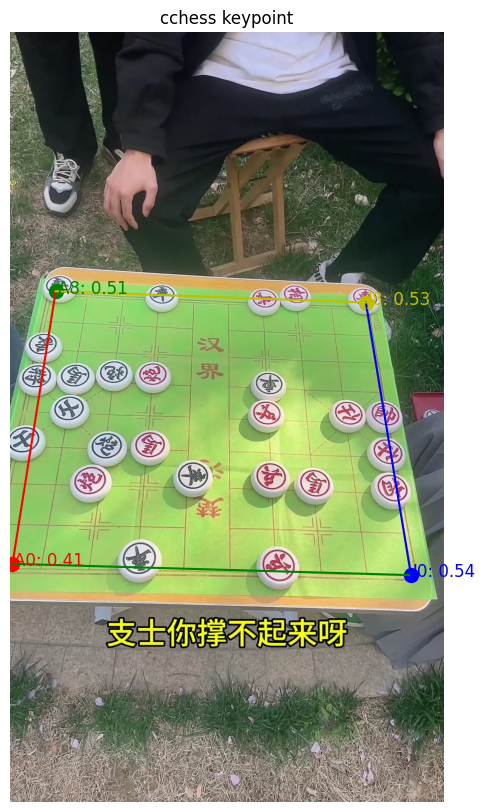

In [2]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from mmpose.apis import inference_topdown
from mmpose.apis import init_model
from mmpose.structures import merge_data_samples

from cchess_pose.datasets import *
from cchess_pose.models import *

# 加载模型
config_file = 'configs/rtmpose-t-cchess_4.py'
checkpoint_file = 'checkpoints/best_coco_AP_epoch_220.pth'  # 替换为实际的检查点文件


device =  'cuda:0' if torch.cuda.is_available() else 'cpu'

model = init_model(config_file, checkpoint_file, device=device)

# 加载测试图像
img = 'data/coco_4/keypoints_val/086_04-1-4.jpg'  # 替换为实际的测试图像
image = cv2.imread(img)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 推理
results = inference_topdown(model, image)
result = merge_data_samples(results)

# 获取关键点
keypoints = result.pred_instances.keypoints[0]
keypoint_scores = result.pred_instances.keypoint_scores[0]

# 可视化结果
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)

# 绘制关键点
colors = ['r', 'g', 'b', 'y']
labels = ['A0', 'A8', 'J0', 'J8']
for i, (point, score) in enumerate(zip(keypoints, keypoint_scores)):
    x, y = point
    plt.scatter(x, y, c=colors[i], s=100, marker='o')
    plt.text(x+5, y+5, f'{labels[i]}: {score:.2f}', fontsize=12, color=colors[i])

# 绘制连线
plt.plot([keypoints[0][0], keypoints[1][0]], [keypoints[0][1], keypoints[1][1]], 'r-')
plt.plot([keypoints[0][0], keypoints[2][0]], [keypoints[0][1], keypoints[2][1]], 'g-')
plt.plot([keypoints[2][0], keypoints[3][0]], [keypoints[2][1], keypoints[3][1]], 'b-')
plt.plot([keypoints[1][0], keypoints[3][0]], [keypoints[1][1], keypoints[3][1]], 'y-')

plt.title('cchess keypoint')
plt.axis('off')
plt.show()

## 9. 预览数据增强效果

使用 preview_transform.ipynb 中的代码预览数据增强效果。

In [ ]:
from mmengine.config import Config
from mmengine.runner import Runner
import mmpose
from mmpose.registry import TRANSFORMS, DATASETS
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch

from cchess_pose.tools.train import merge_args
from argparse import Namespace


# 加载配置文件
config_path = 'configs/rtmpose-t-cchess_4.py'
args = Namespace(config=config_path, work_dir='./work_dirs/demo', resume=None,
                 amp=False, no_validate=False, auto_scale_lr=False, show_dir=None,
                 show=False, interval=1, wait_time=1, cfg_options=None, launcher='none',
                 local_rank=0)
config = Config.fromfile(config_path)
cfg = merge_args(config, args)

# 构建数据加载器
runner = Runner.from_cfg(cfg)
train_dataloader = runner.build_dataloader(cfg.train_dataloader)
dataset = train_dataloader.dataset

# 定义可视化函数
colors_4 = np.random.randint(0, 256, (6, 3))
BONE_NAMES = ["A0", "A8", "J0", "J8"]

def get_simcc_maximum(simcc_x, simcc_y, input_size=(256, 256)):
    x_indices = np.argmax(simcc_x[0], axis=1)
    y_indices = np.argmax(simcc_y[0], axis=1)

    input_w, input_h = input_size
    x_coords = x_indices / (input_w * 2)
    y_coords = y_indices / (input_h * 2)

    keypoints = np.stack([x_coords, y_coords], axis=1)
    scores = np.max(simcc_x[0], axis=1) * np.max(simcc_y[0], axis=1)

    return keypoints, scores

def draw_keypoints(img_rgb, keypoints, font_scale=1, font_thickness=2):
    for i, (x, y) in enumerate(keypoints):
        color = colors_4[i]
        cv2.circle(img_rgb, (int(x), int(y)), 5, (int(color[0]), int(color[1]), int(color[2])), -1)
        bone_name = BONE_NAMES[i]
        cv2.putText(img_rgb, f"{bone_name}", (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (int(color[0]), int(color[1]), int(color[2])), font_thickness)
    return img_rgb



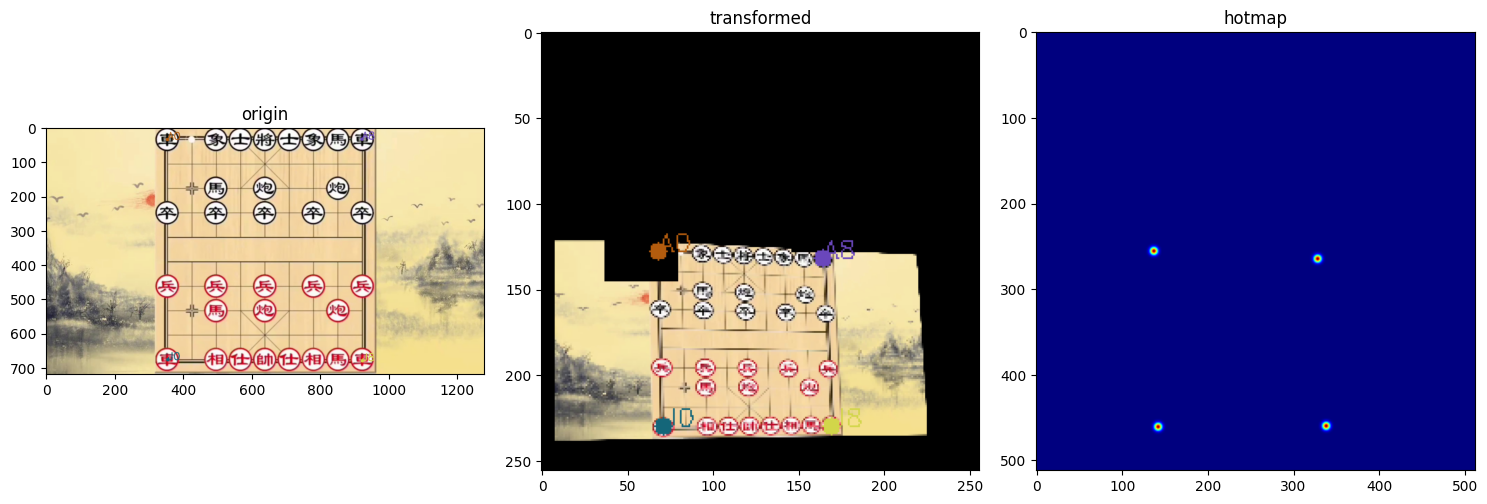

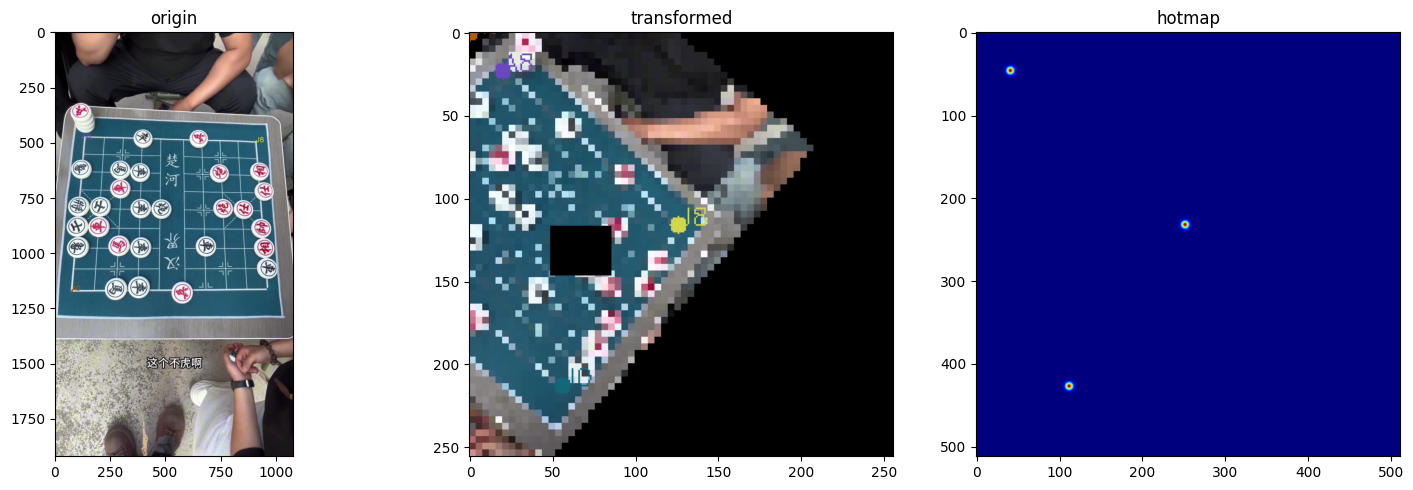

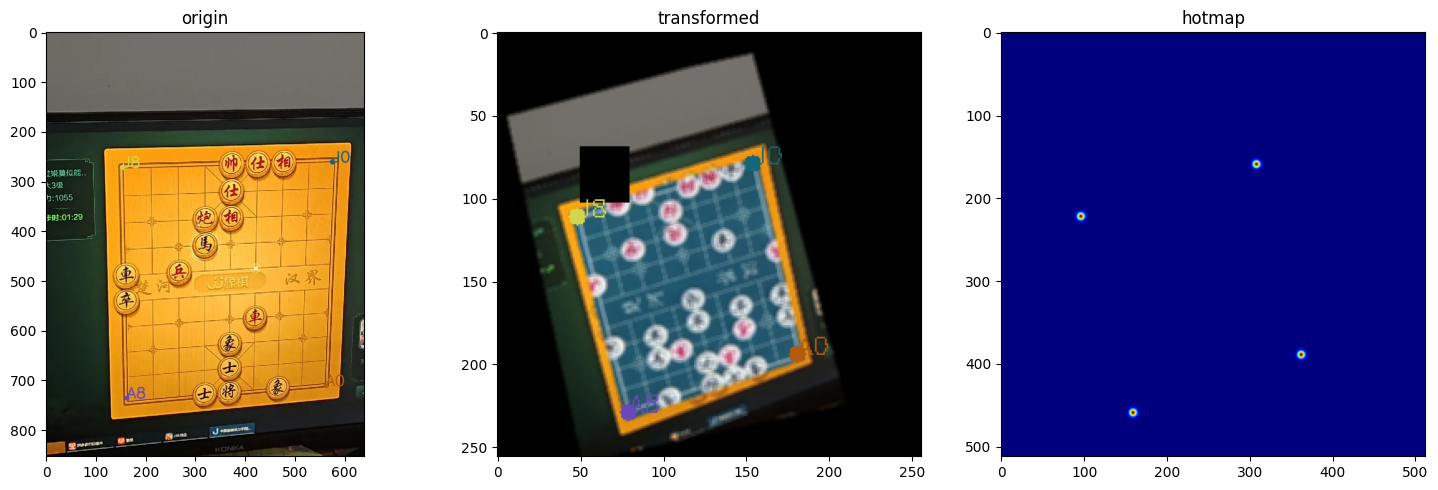

In [5]:
# 显示原始图像和变换后的图像
plt.rcParams['figure.figsize'] = [15, 5]

for i in range(3):
    plt.figure()
    try:
        dataset_item = dataset[i]
        img_path = dataset_item['data_samples'].img_path
        origin_xyv = dataset_item['data_samples'].raw_ann_info['keypoints']
        origin_xyv_34 = [origin_xyv[i:i+2] for i in range(0, len(origin_xyv), 3)]

        plt.subplot(1, 3, 1)
        origin_with_keypoint = draw_keypoints(
            cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB),
            origin_xyv_34, 1, 2)
        plt.imshow(origin_with_keypoint)
        plt.title('origin')

        plt.subplot(1, 3, 2)
        transform_img = dataset_item['inputs'].numpy().transpose(1, 2, 0)
        x_labels = dataset_item['data_samples'].gt_instance_labels.keypoint_x_labels.numpy()
        y_labels = dataset_item['data_samples'].gt_instance_labels.keypoint_y_labels.numpy()
        gt_transform_keypoints, gt_transform_scores = get_simcc_maximum(x_labels, y_labels)
        gt_transform_keypoints *= 256
        transform_xy_34 = gt_transform_keypoints.tolist()

        transform_img = transform_img.astype(np.uint8)
        transform_img = cv2.cvtColor(transform_img, cv2.COLOR_BGR2RGB)
        transform_with_keypoint = draw_keypoints(transform_img, transform_xy_34, 0.5, 1)
        plt.imshow(transform_with_keypoint)
        plt.title('transformed')

        plt.subplot(1, 3, 3)
        x_labels_tensor = torch.from_numpy(x_labels)
        y_labels_tensor = torch.from_numpy(y_labels)
        batch_heatmaps = torch.matmul(y_labels_tensor.transpose(1,2), x_labels_tensor)
        heatmaps = batch_heatmaps[0].numpy()
        plt.imshow(heatmaps, cmap='jet')
        plt.title('hotmap')

        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"处理样本 {i} 时出错: {e}")
        continue

# 10. 导出 onnx


将模型导出为 ONNX 格式，以便在其他环境中部署。

pose-detection_simcc_onnxruntime_dynamic.py



In [4]:
%cd /content/chinese-chess-recognition/cchess_pose



!python tools/deploy.py \
    configs/deploy/pose-detection_simcc_onnxruntime_dynamic.py \
    configs/rtmpose-t-cchess_4.py \
    checkpoints/best_coco_AP_epoch_220.pth \
    data/coco_4/keypoints_val/102_00-7-0.jpg \
    --work-dir work_dirs/deploy \
    --device cpu

/content/chinese-chess-recognition/cchess_pose
/usr/local/lib/python3.11/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
/usr/local/lib/python3.11/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
args:  data/coco_4/keypoints_val/102_00-7-0.jpg work_dirs/deploy cchess_pose4.onnx configs/deploy/pose-detection_simcc_onnxruntime_dynamic.py configs/rtmpose-t-cchess_4.py checkpoints/best_coco_AP_epoch_220.pth cpu
/usr/local/lib/python3.11/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchS